# CNN(Convolution Neural Network)

## 이미지 데이터
- 컬러 이미지는 RGB 3개의 채널로 하나의 pixel을 구성하고 pixel들의 조합으로 하나의 이미지를 구성한다.
  - 흑백 이미지는 1개의 채널로 존재한다.
- 하나의 이미지 데이터에 대한 shape는 (H, W, C)이 된다.
  - H : 높이, W : 너비, C : 채널
- 예를 들어 $500 \times 500$ 사이즈의 컬러 이미지 데이터는 (500, 500, 3)의 모양을 가진다.
- 입력 데이터로 사용되는 이미지 데이터는 전체 이미지의 개수까지 합쳐서(N, 500, 500, 3)의 4차원 배열의 모양을 가진다.

### 이미지 데이터 입력시 Fully Connecte Layer 모델링의 한계
- 해당 이미지를 Fully Connected Layer 모델링을 이용할 경우, 평탄화한 데이터의 모양은 (N, 750000)이 된다. 은닉층에서 뉴런의 개수를 512개로 지정한 `dense layer`에 적용시 이미지 한 개의 데이터에 대해 가중치 개수는 $750000 * 512 = 384000000$개가 된다. 이는 은닉층이 깊어질 수록 더 많은 수의 가중치가 생겨날 것이다.
-  즉, 이미지 데이터를 평탄화한 후 모델을 생성할 경우 하드웨어적인 자원 소모가 아주 큰 문제점이 발생한다.
- 또한 이미지에는 공간적인 정보가 존재하는데, 평탄화된 이미지 데이터는 기존 공간 정보(위치 정보값)을 잃어버리게 된다. 결과적으로 이미지 공간 정보 유실로인한 정보 부족으로 인공 신경망이 특징을 추출 및 학습하는 것이 비효율적이고 정확도를 높이는데 한계가 존재한다.

## CNN
- 합성곱(Convolution) 신경망(Neural Network)
- 사람이 특정 데이터에 대한 특징을 기억한 후 특징을 통해 해당 데이터를 인식하는 것을 모방한 기술
- 이미지를 인식하기 위해 특징추출(Feature Extraction) 과정을 통해이 이미지의 특징을 충분히 파악한 후 평탄화이미지를 분류
- 이미지의 공간 정보(위치 정보값)를 유지한 채 학습 하는 모델

## CNN의 구조
- 입력층(Input Layer)
- **특칭 추출(Feature Extraction) 영역**
  - **Convolution(합성곱) Layer**와 **Polling Layer**를 여러 겹 쌓는 형태
- 평탄화층(Flattern Layer)
- 은닉층(Hidden Layer)
  - `Dense Layer`
  - `Activation Layer`
- 출력층(Output Layer)
  - `Dense Layer`
  - `Activation Layer` - `softmax` 활성 함수 적용

## CNN 알고리즘 - Convolution Layer
- **입력 특성 맵**(Input Featre Matix)과 **커널(필터; Filter)의 합성곱 연산**의 결과로 **출력 특성 맵**(Output Feautre Matrix)이 생성된다.

### 패딩(Padding)
- `zero-padding` : 입력 특징 맵 가장자리에 0의 값을 갖는 픽셀을 추가
- 입력 특징 맵과 출력 특징 맵이 똑같은 크기로 유지되도록 패딩을 설정하여 기존의 위치정보를 그대로 유지할 수 있게 한다.

### 스트라이드(Stride)
- 필터의 이동거리(이동량)
- `stride=1` 입력 특징 맵에 적용되는 필터(커널)을 한 칸씩 이동
- 스트라이드가 커지면 출력 특성 맵 크기가 작아지게 된다.

### Pooling Layer
- 출력 특성 맵에 적용
- 이미지의 크기를 유지한 채 Fully Connected Layer로 데이터가 전달되면 연산량이 기하급수적으로 늘기 때문에, Polling으로 적당히 맵 크기를 줄이고 특정 피처를 강조할 수 있게 한다.
- Average Pooling, Max Pooling, Min Poolin
- 일반적으로 Max Pooling 사용
  - 커널과 비슷하게 Pooling filter가 입력 특성 맵과 합성곱 연산을 하여 각 값중 가장 큰 값만 추출하는 방식
  - 출력 특징 맵을 기존의 절반으로 줄일 수 있다.


## CNN 실습

### MNIST 데이터 준비
- 텐서플로우에서 제공하는 손그림 이미지 데이터셋

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 데이터 형상(shape) 확인 및 이미지 시각화

In [9]:
image = X_train[0]
image.shape

(28, 28)

- 현재 이미지 데이터에 W, H의 정보는 있으나 C(채널) 정보는 없는 것을 확인

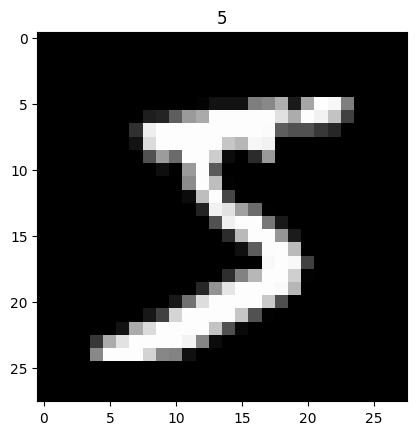

In [10]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

### CNN 레이어에 삽입하기 위한 배열 편집
* 4차원 형태의 데이터를 유지해야 한다.
  - 이미지를 위해 CNN 처리를 하기 위해서는 반드시 배열의 shape를 유지해야 한다.
* `(N, H, W, C)` -> `(배치크기, 높이, 가로, 채널수)`
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1ch
* 1장의 이미지 - `(28, 28)` -> `(1, 28, 28, 1)`로 바꿔줘야 한다.

In [11]:
# newaxis 이용하여 채널에 대한 차원을 강제로 추가(증가)
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

- `...`
  - 행이나 열의 개념이 아닌 스프레드 연산자이다.
  - 원하는 차원의 값을 모두 가져오는 것. 기존 이미지 데이터에 존재하는 2차원을 가져온 것
  - `[tf.newaxis, ..., tf.newaxis]`는 `[tf.newaxis, :, :, tf.newaxis]`와 동일한 의미

### Conv(합성곱) 레이어 사용하기
keras의 대표적인 CNN 레이어는 두가지가 있다.

1. Conv2D
  * `stride`가 2 방향으로 움직인다.( 가로, 세로 )
  * **이미지 분석**을 위해 사용되는 일반적인 합성곱 레이어

2. Conv1D
  * `stride`가 1 방향으로 움직인다. (세로)
  * **텍스트 분석**을 위해 사용되는 레이어. ( 대표적인 예 `char CNN` )


### Conv2D 매개변수 확인
- `filters` : 필터(커널)의 개수 ($C_{out}$ : 출력 특징 맵의 채널 개수)
-  `kernle_size` : 필터의 크기 ($K_H$, $K_W$)
  - 보통 정사각형의 홀수 크기를 사용하고, 짝수 크기는 잘 사용하지 않는다.
  - $1 \times 1$, $3 \times 3$, $5 \times 5$, $7 \times 7$ 주로 사용
- `strides` : 필터의 이동 거리. 몇개의 픽셀을 스킵하면서 필터가 훑게 할지 결정
- `padding` : 0으로 쌓여진 패딩을 만들 것인지 설정
  - `padding='Valid'` : 패딩을 만들지 않음
  - `padding='SAME'` : 한 개 짜리 패딩 생성 - 이미지 주변을 한 줄로 감싸기
- `activation` : 활성화 함수 지정. 따로 지정하지 않고 추후 레이어로 추가 가능


In [12]:
# Conv2D 레이어 생성
tf.keras.layers.Conv2D(
    filters = 3, # 필터 개수
    kernel_size = (3, 3), # 필터의 (H, W) 크기 지정
    # kernel_size = 3으로 튜플이 아닌 정수 형태로 지정해도 자동으로 3 x 3 필터로 만들어준다.
    strides = (1, 1), # 필터의 이동 거리(크기)
    # strides = 1로 지정해도 1 x 1 stride로 설정
    padding='SAME', # 패딩여부 - 패딩 적용
    activation='relu' # 활성화 함수 ReLu 적용
)

### Conv 레이어 시각화

In [13]:
# 이미지 데이터를 tensorflow 형태로 만들어줌
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [14]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding='SAME')

- `filters=5` : 커널함수의 개수가 5개. 즉, 출력 특징 맵의 채널의 개수는 5개가 될 것이다.

In [15]:
output = layer(image) # image를 Conv2D 레이어에 통과 시킴
output.shape

TensorShape([1, 28, 28, 5])

- 출력 특징 맵의 채널의 개수 5인 것을 확인

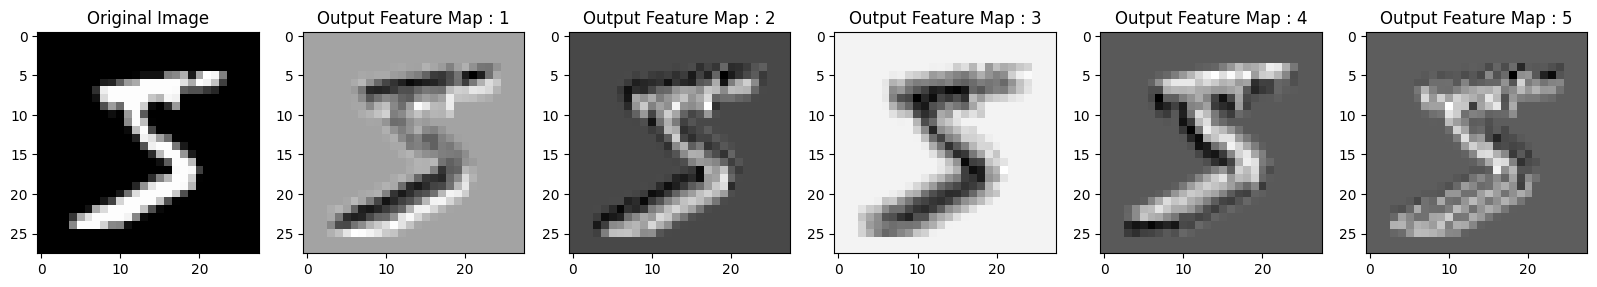

In [16]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output Feature Map : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

- 입력 특징 맵과 5개의 출력 특징 맵 시각화 확인

### Filter 시각화 하기
* CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기 한다.
* `keras`의 레이어들은 `get_weights()` 함수를 이용해서 편향과, 가중치 등을 볼 수 있다.

In [17]:
# Conv2D 레이어의 필터 모양 : ( H, W, C_in, C_out ) - ( 필터 세로, 필터 가로, 입력 특징 맵의 채널 개수, 출력 특징 맵의 채널 개수)
weights = layer.get_weights()

* `weights[0]` : 가중치가 들어 있음
* `weights[1]` : 편향이 들어 있음

In [18]:
print("가중치(필터)의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치(필터)의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


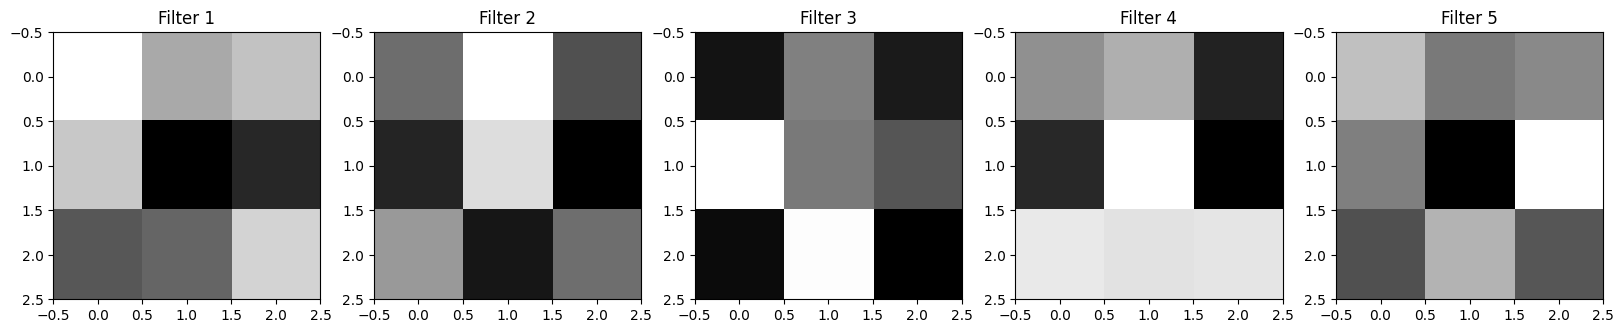

In [19]:
# 필터 시각화
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

- 검정색일 수록 학습이 덜 된 부분, 흰색일 수록 학습이 잘 된 부분을 의미
- 지금은 모델 학습이 안 된 상태이기 때문에, 시각화 결과를 확인해도 각 필터가 무엇을 의미하는지 알 수 없다.

### ReLU 레이어 사용하기
* **이미지 데이터에서 음수 데이터는 필요가 없는 데이터**이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 **이미지 분석에서 `ReLU`가 일반적으로 자주 사용**된다.

In [20]:
import numpy as np
np.min(output), np.max(output)

(-263.74423, 154.53021)

- 출력 특징 맵에 음수값이 있는 것을 확인

In [21]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 합성곱의 결과가 활성화 레이어로 들어간다.
act_output.shape

TensorShape([1, 28, 28, 5])

- 합성화 함수를 데이터가 통과해도 형태는 변하지 않는다.

In [22]:
np.min(act_output), np.max(act_output)

(0.0, 154.53021)

- ReLU 함수를 적용하고 나니, 음수 값이 0으로 바뀐 것을 확인할 수 있다.

### ReLU 시각화

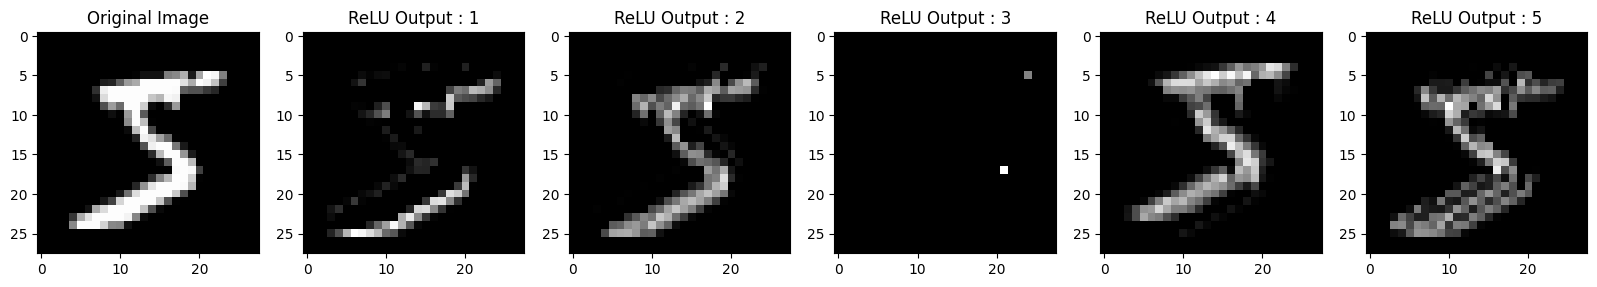

In [23]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

- 흰색부분이 활성화가 잘 된 부분, 검은색이 음수여서 활성화가 안된 부분을 의미

### MaxPooling 레이어 사용하기
`Pooling`과정을 통해 이미지 축소 및 정보의 종합을 구현할 수 있다.

In [24]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

- Pooling filter를 사용해서 `TensorShape([1, 28, 28, 5])`에서 `TensorShape([1, 14, 14, 5])`로 이미지의 크기가 줄어들었다.
  - 이미지의 크기가 줄어들면, 이미지의 특성이 줄어들 가능성이 높아진다.
- 하지만 이미지의 특성을 알아볼 수 있을 정도로만 이미지 축소가 되면 특징 추출에 문제가 없다.

### MaxPooling 시각화

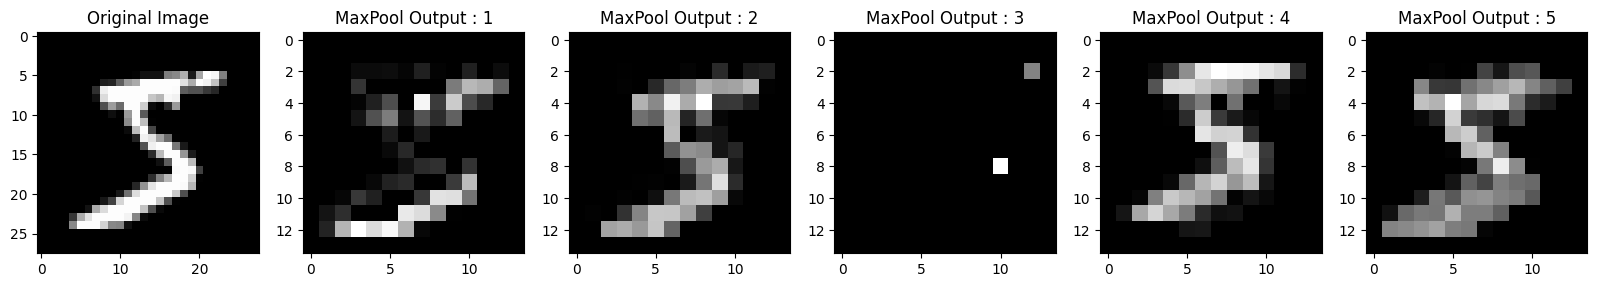

In [25]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

### 특징 추출 과정
**여기까지의 과정을 특징 추출 과정(Feature Extraction)**
1. Conv 레이어에 삽입하기 위해 입력 데이터의 차원 추가(4차원)
2. Conv 레이어 통과 - 입력 특징 맵과 필터 합성곱 연산을 통해 출력 특징 맵 반환
3. ReLu 레이어 통과 - 음수 데이터 0으로 변환
4. MaxPolling 레이어 통과 - 이미지 축소 및 정보 종합 구현
- 특징 추출은 예측을 하기 위한 과정이 아닌, 데이터(이미지)에 대한 특징만 추출
- 기존 데이터에 비해 많은 정보가 사라진 상태이지만 5라는 이미지를 잘 나타낼 수 있도록 강조되는 특정 위치 정보(특징)만 가져온 것
- 원본 데이터에에 있는 필요하지 않은 복잡한 위치 정보를 제거

특징 추출을 통해 얻은 출력 특징 맵을 모델 예측을 위해 평탄화 후 은닉층 > 출력층에 전달하면 된다.

### Flatten 레이어 확인하기
- 예측을 수행하기 위해서는 Fully Connected(전결합) 과정이 필요
  - `Dense Layer` 사용
- Fully Connected Layer를 사용하기 위해서 데이터 평탄화 작업이 필요하다.

In [26]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape

TensorShape([1, 980])

- 특징 추출을 통해 반환된 `pool_output`을 평탄화를 통해 2차원 배열로 차원 축소

### Dense 레이어 확인하기
* 계산 과정 $WX+b$을 하기 위한 `Dense`레이어. `Fully Connected Layer` 라고도 한다.

In [27]:
# 유닛이 32개인 Dense 레이어 만들기 - 은닉층
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

### 출력층(Output Layer) 설계

In [28]:
# 출력층 설계
# 숫자 종류는 10개 > 클래스가 10개이므로 출력층의 뉴런 개수도 10개로 지정
dense_layer2 = tf.keras.layers.Dense(10, activation='softmax')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

---

### Sequential Model로 MNIST 분류기 만들기
- 위 전 과정을 `Sequential` 모델로 한 번에 수행할 수 있다.
- `Sequential` 모델은 값을 직접 넘겨주지 않아도, 레이어만 잘 넣어주면 사용할 수 있기 때문에 초보자도 편하게 사용할 수 있다.

In [29]:
## 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Input

model = Sequential([
  # 입력층
  Input(shape=(28, 28, 1)),

  # 특성 추출
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  MaxPool2D(pool_size=(2, 2)),

  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  ## 은닉층(Fully Connected)

  # 평탄화 - 은닉층을 구성하기 위한 최초 작업
  Flatten(),

  # 인공신경망 행렬 내적 계산
  Dense(512, activation='relu'),

  # 출력층
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 re_lu_2 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

### 특성 추출 관련 레이어 설정
- 레이어 구성을 직접 설정할 수 있지만, 예측 성능이 높도록 값을 조정하는 과정이 필요하다.
- 어떤 레이어 구성이 최적일지 알기 어렵기 때문에, 왠만한 성능을 보장하는 논문에 의해 구현된 모델을 사용한다.

### 모델 컴파일

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 모델 학습을 위한 데이터 변환

In [32]:
# 데이터의 형태 파악
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [33]:
# X 데이터에 채널 차원 추가
X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
# 이미지 정규화 작업
# 255.0 으로 나눠주면 된다.

X_train = X_train / 255.0
X_test = X_test / 255.0

### 모델 학습

In [35]:
model.fit(X_train,
          y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 254s 168ms/step - loss: 0.1153 - acc: 0.9644 - val_loss: 0.0397 - val_acc: 0.9883
Epoch 2/10
1500/1500 [==============================] - 235s 157ms/step - loss: 0.0384 - acc: 0.9885 - val_loss: 0.0335 - val_acc: 0.9902
Epoch 3/10
1500/1500 [==============================] - 223s 149ms/step - loss: 0.0265 - acc: 0.9911 - val_loss: 0.0338 - val_acc: 0.9913
Epoch 4/10
1500/1500 [==============================] - 213s 142ms/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0360 - val_acc: 0.9891
Epoch 5/10
1500/1500 [==============================] - 215s 143ms/step - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0343 - val_acc: 0.9913
Epoch 6/10
1500/1500 [==============================] - 212s 141ms/step - loss: 0.0124 - acc: 0.9962 - val_loss: 0.0345 - val_acc: 0.9921
Epoch 7/10
1500/1500 [==============================] - 215s 144ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0329 - val_acc: 0.9915
Epoch 8/10
1500/1500 [============

### 모델 훈련 완료 후 필터 시각화

In [36]:
conv_layers = [layer for layer in model.layers if layer.__class__.__name__ == "Conv2D"]
conv_layers

1 층의 Conv Layer 필터


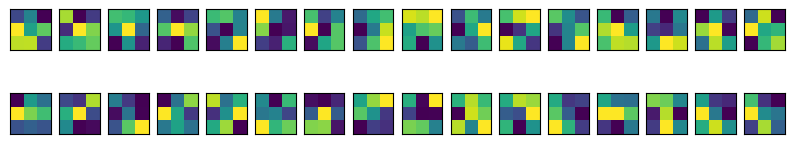

2 층의 Conv Layer 필터


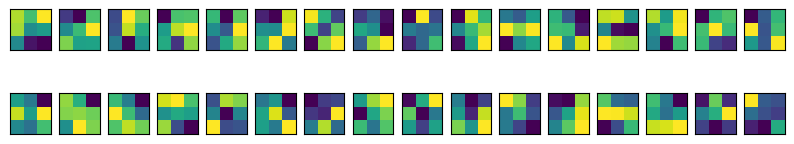

3 층의 Conv Layer 필터


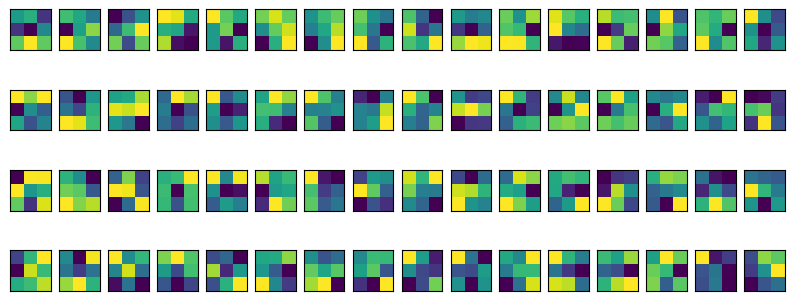

4 층의 Conv Layer 필터


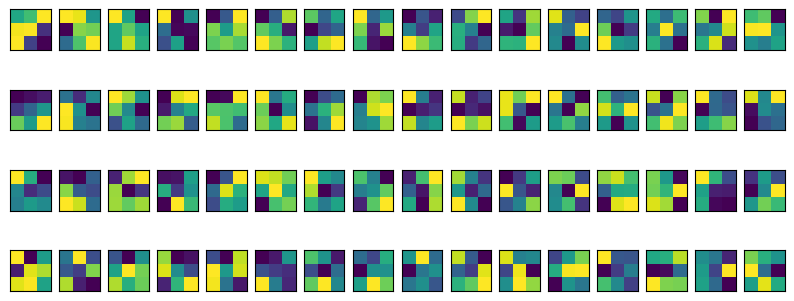

In [37]:
for i, conv_layer in enumerate(conv_layers):
  print(f"{i+1} 층의 Conv Layer 필터")

  weights = conv_layer.get_weights()[0]

  _, axes = plt.subplots(nrows=int(weights.shape[-1]/16), ncols=16, figsize=(10, int(weights.shape[-1]/16)))

  for idx, ax in enumerate(axes.ravel()):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(weights[..., 0, idx])

  plt.show()

- 기본적으로 시각화된 필터 각각이 뭘 의미하는지 해석할 수 없다.
- 필터의 크기를 아주 크게 값을 키우면 해석을 할 수 있을 가능성이 있긴 하다.

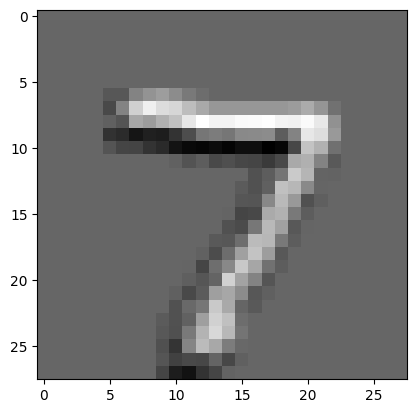

In [38]:
image = conv_layers[0](X_test[0].reshape(1, 28, 28, 1))

plt.imshow(image[0,...,0], 'gray')
plt.show()